Task-12

## Namespace and Scope

###`Q1:` Write `Person` Class as given below and then display it's namespace.



```
Class Name - Person

Attributes:
name - public
state - public
city - private
age - private

Methods:
address - public
It give address of the person as "<name>, <city>, <state>"
```

In [4]:
class Person:

  def __init__(self, name, state, city, age):
    self.name = name
    self.state = state
    self.__city = city
    self.__age = age

  def address(self):
    return "{}, {}, {}".format(self.name,self.__city,self.state)

In [5]:
p = Person('kiran','haryana','gurgoan',34)
print(p.address())

kiran, gurgoan, haryana


In [6]:
who

Person	 p	 


In [7]:
whos

Variable   Type      Data/Info
------------------------------
Person     type      <class '__main__.Person'>
p          Person    <__main__.Person object at 0x7f242b52b940>


In [17]:
dir(Person)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'address']

In [21]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Person.__init__(self, name, state, city, age)>,
              'address': <function __main__.Person.address(self)>,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None,
              '__annotations__': {}})

In [14]:
for i in Person.__dict__:
  print(i)

__module__
__init__
address
__dict__
__weakref__
__doc__
__annotations__


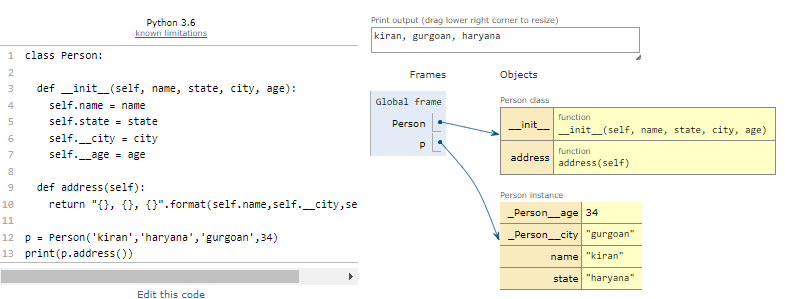

###`Q2:` Write a program to show namespace of object/instance of above(Person) class.

In [15]:
p.__dict__

{'name': 'kiran',
 'state': 'haryana',
 '_Person__city': 'gurgoan',
 '_Person__age': 34}

In [16]:
p2 = Person('james','maharashtra','mumbai',23)
p2.__dict__

{'name': 'james',
 'state': 'maharashtra',
 '_Person__city': 'mumbai',
 '_Person__age': 23}

In [18]:
dir(p)

['_Person__age',
 '_Person__city',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'address',
 'name',
 'state']

###`Q3:` Write a recursive program to to calculate `gcd` and print no. of function calls taken to find the solution.
```
gcd(5,10) -> result in 5 as gcd and function call 4
```

In [45]:
counter = 0
def gcd(a,b):
  global counter
  counter += 1
  if b==0:
    return a
  return gcd(b,a%b)

In [46]:
gcd(10,5)

5

In [47]:
counter

2

## Iterator And Generator

###`Q4:` Create MyEnumerate class,
Create your own `MyEnumerate` class such that someone can use it instead of enumerate. It will need to return a `tuple` with each iteration, with the first element in the tuple being the `index` (starting with 0) and the second element being the `current element` from the underlying data structure. Trying to use `MyEnumerate` with a noniterable argument will result in an error.

```
for index, letter in MyEnumerate('abc'):
    print(f'{index} : {letter}')
```

Output:
```
0 : a
1 : b
2 : c
```

In [38]:
# iterator
class MyEnumerate:

  def __init__(self,data):
    self.data = data
    self.index = 0

  def __iter__(self):
    return self

  def __next__(self):
    if '__iter__' not in dir(self.data):
      raise TypeError('Data must be iterable')
    else:
      if self.index >= len(self.data):
        raise StopIteration
      current = self.data[self.index]
      self.index += 1
      return '{} : {}'.format(self.index - 1, current)

  def __repr__(self):
    return f'{type(self).__name__}({self.data})'

In [39]:
e = MyEnumerate('abc')
f = MyEnumerate(['apple', 'banana', 'cherry'])
g = MyEnumerate(10)

In [42]:
f

MyEnumerate(['apple', 'banana', 'cherry'])

In [40]:
for i in e:
  print(i)

0 : a
1 : b
2 : c


In [41]:
for i in f:
  print(i)

0 : apple
1 : banana
2 : cherry


In [43]:
g

MyEnumerate(10)

In [44]:
for i in g:
  print(i)

TypeError: Data must be iterable

In [48]:
# using generator
def gen_demo(data):
  if '__iter__' not in dir(data):
    raise TypeError('Data must be iterable')
  else:
    for i in range(len(data)):
      yield '{} : {}'.format(i,data[i])

In [49]:
g = gen_demo('abc')
for i in g:
  print(i)

0 : a
1 : b
2 : c


In [50]:
h = gen_demo(10)
for i in h:
  print(i)

TypeError: Data must be iterable

###`Q5:` Iterate in circle
Define a class, `Circle`, that takes two arguments when defined: a sequence and a number. The idea is that the object will then return elements the defined number of times. If the number is greater than the number of elements, then the sequence  repeats as necessary. You can define an another class used as a helper (like I call `CircleIterator`).

```
c = Circle('abc', 5)
d = Circle('abc', 7)
print(list(c))
print(list(d))
```

Output
```
[a, b, c, a, b]
[a, b, c, a, b, c, a]
```

In [22]:
class Circle:

  def __init__(self,data,num):
    self.data = data
    self.num = num
    self.index = 0

  def __iter__(self):
    return self

  def __next__(self):
    if self.index >= self.num:
      raise StopIteration
    current = self.data[self.index % len(self.data)]
    self.index += 1
    return current

  def __repr__(self):
    return f'{type(self).__name__}({self.data},{self.num})'

In [27]:
c = Circle('abc', 5)
d = Circle('abc', 7)

In [28]:
print(list(c))

['a', 'b', 'c', 'a', 'b']


In [29]:
print(list(d))

['a', 'b', 'c', 'a', 'b', 'c', 'a']


In [30]:
c

Circle(abc,5)

###`Q6:` Generator time elapsed
Write a generator function whose argument must be iterable. With each iteration, the generator will return a two-element tuple. The first element in the tuple will be an integer indicating how many seconds have passed since the previous iteration. The tuple’s second element will be the next item from the passed argument.

Note that the timing should be relative to the previous iteration, not when the
generator was first created or invoked. Thus the timing number in the first iteration
will be 0

```
for t in elapsed_since('abcd'):
    print(t)
    time.sleep(2)
```

Output:
```
(0.0, 'a')
(2.005651817999933, 'b')
(2.0023095009998997, 'c')
(2.001949742000079, 'd')
```
Note: Your output may differ because of diffrent system has different processing configuration.

In [1]:
import time
def elapsed_since(data):
  if '__iter__' not in dir(data):
    raise TypeError('Data must be iterable')
  else:
    last_time = time.perf_counter()
    for item in data:
      current_time = time.perf_counter()
      delta = current_time - last_time
      last_time = current_time
      yield (delta, item)

In [2]:
for t in elapsed_since('abcd'):
    print(t)
    time.sleep(2)

(1.5890000213403255e-06, 'a')
(2.0022500449999825, 'b')
(2.0021231700000044, 'c')
(2.002369038000012, 'd')


In [3]:
for t in elapsed_since(1):
  print(t)

TypeError: Data must be iterable

In [44]:
help(time.perf_counter)

Help on built-in function perf_counter in module time:

perf_counter(...)
    perf_counter() -> float
    
    Performance counter for benchmarking.



## Decorators

###`Q7:` Write a Python program to make a chain of function decorators (bold, italic, underline etc.) on a given function which prints "hello world"

```
def hello():
    return "hello world"
```

```
bold - wrap string with <b> tag. <b>Str</b>
italic - wrap string with <i> tag. <i>Str</i>
underline- wrap string with <u> tag. <u>Str</u>
```

In [45]:
def bold(func):
  def wrapper():
    return '\033[1m' + func() + '\033[0m'
  return wrapper

def italic(func):
  def wrapper():
    return '\033[3m' + func() + '\033[0m'
  return wrapper

def underline(func):
  def wrapper():
    return '\033[4m' + func() + '\033[0m'
  return wrapper

In [46]:
@bold
@italic
@underline
def hello():
  return 'hello world'

In [47]:
print(hello())

hello world


In [50]:
s = 'hello world'
print(s)
print("\033[91m" + s + '\033[0m')
print("\033[92m" + s + '\033[0m')
print("\033[94m" + s + '\033[0m')
print("\033[1m" + s + '\033[0m')
print("\033[3m" + s + '\033[0m')
print("\033[4m" + s + '\033[0m')

hello world
hello world
hello world
hello world
hello world
hello world
hello world


In [ ]:
# codes
red = '\033[91m'
green = '\033[92m'
blue = '\033[94m'
bold = '\033[1m'
italics = '\033[3m'
underline = '\033[4m'
end = '\033[0m'

In [51]:
def make_bold(func):
    def wrapped():
        return "<b>"+ func() + "</b>"
    return wrapped
def make_italic(func):
    def wrapped():
        return "<i>"+ func() + "</i>"
    return wrapped
def make_underline(func):
    def wrapped():
        return "<u>"+ func() + "</u>"
    return wrapped

@make_bold
@make_italic
@make_underline
def hello():
    return "hello world"

print(hello())

<b><i><u>hello world</u></i></b>


###`Q8:` Write a decorator called `printer` which causes any decorated function to print their return values. If the return value of a given function is `None`, printer should do nothing.



In [89]:
def printer(func):
  def wrapper(*args,**kwargs):
    result = func(*args,**kwargs)
    if result is not None:
      return result
  return wrapper

In [90]:
@printer
def add(a,b):
  return a+b

print(add(5,6))

@printer
def mul(a,b,c):
  return a*b*c

print(mul(5,6,10))

@printer
def hello():
  pass

print(hello())

11
300
None


###`Q9:` Make a decorator which calls a given function twice. You can assume the functions don't return anything important, but they may take arguments.
```
#Lets say given function
def hello(string):
    print(string)

#on calling after specified decorator is inplaced
hello('hello')
```

Output:
```
hello
hello
```

In [91]:
def double(func):
  def wrapper(*args,**kwargs):
    func(*args,**kwargs)
    func(*args,**kwargs)
  return wrapper

In [92]:
@double
def hello(string):
  print(string)

In [93]:
hello('hello world')

hello world
hello world


In [96]:
@double
def add(a,b):
  print(a+b)

In [97]:
add(5,7)

12
12


### `Q10:` Write a decorator which doubles the return value of any function. And test that decoratos is working correctly or not using `assert`.

```
add(2,3) -> result in 10. Without decorator it should be 5.
```

In [113]:
def doubleValue(func):
  def wrapper(*args,**kwargs):
    result = func(*args,**kwargs)
    return result*2
  return wrapper

In [116]:
@doubleValue
def addWithDecorator(a,b):
  return a+b

def add(a,b):
  return a+b

a = 2
b = 3
assert add(a,b) == addWithDecorator(a,b), 'Values are not equal'
print('Values are equal')

AssertionError: Values are not equal

In [117]:
assert add(a,b)*2 == addWithDecorator(a,b), 'Values are not equal'
print('Values are equal')

Values are equal


In [118]:
add(2,3)

5

In [119]:
addWithDecorator(2,3)

10

In [103]:
@doubleValue
def mul(a,b,c):
  return a*b*c

mul(2,3,4)

48

In [104]:
@doubleValue
def hello():
  return 'hello world'

hello()

'hello worldhello world'

[assert](https://www.geeksforgeeks.org/python-assert-keyword/)<br>
[refer this](https://www.w3schools.com/python/ref_keyword_assert.asp)
